# **Project 1** : Exploratory Data Analysis (EDA)

* Dataset Name : *Retail Sales Dataset*
* Dataset
Link : https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

---
# 1.  Data Loading and Cleaning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Dataset
df = pd.read_csv('dataset.csv')

# Display first few rows
df.head()

#summary the statistics
df.describe()

#check for the missing values columns have and count them
df.isnull().sum()

# Drop rows with missing values or fill them as appropriate
df.dropna(inplace=True)  # or df.fillna(method='ffill', inplace=True)

# Now you should be able to call dtypes correctly
df.dtypes


Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

---
# 2. Descriptive Statistics
* Basic Statistics

In [ ]:
# Basic Statistics
statistics = df.describe()
#Correlation
corr=df.corr
# Descriptive statistics for categorical data
print(df['Product Category'].value_counts())
print(df['Customer ID'].value_counts())

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
Customer ID
CUST001     1
CUST672     1
CUST659     1
CUST660     1
CUST661     1
           ..
CUST339     1
CUST340     1
CUST341     1
CUST342     1
CUST1000    1
Name: count, Length: 1000, dtype: int64


In [ ]:
# Calculate median for numeric columns
median_values = df[numeric_columns].median()

# Calculate mode for numeric columns
mode_values = df[numeric_columns].mode().iloc[0]

# Calculate standard deviation for numeric columns
std_dev_values = df[numeric_columns].std()

print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)
print("Standard Deviation:\n", std_dev_values)


Median Values:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
Mode Values:
 Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64
Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


---
# 3. Time Series Analysis
  

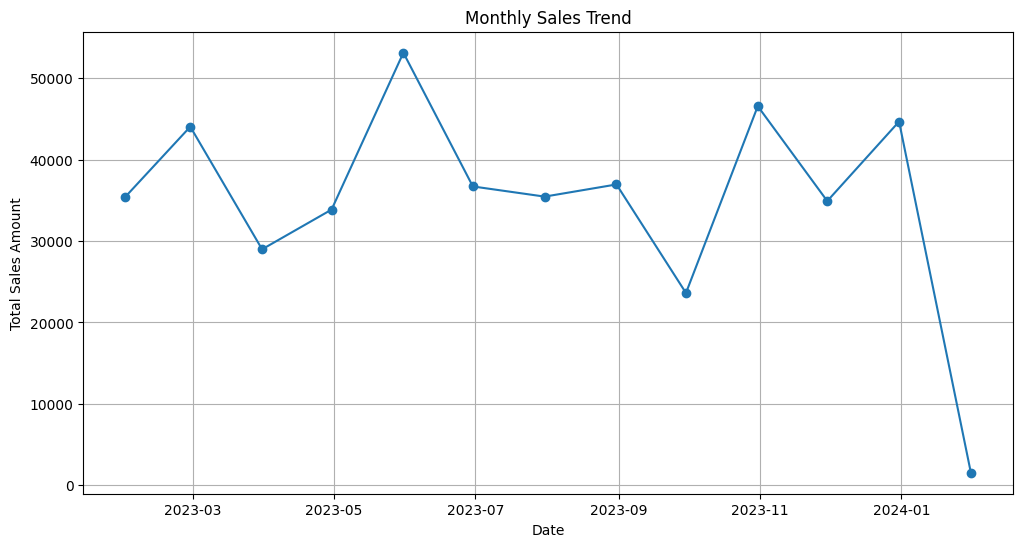

In [ ]:

monthly_sales = df.resample('M')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


---
# 4. Customer and  Product Analysis
*  For Customer Demographics

In [ ]:
# Analyze customer demographics
age_distribution = df['Age'].describe()
gender_distribution = df['Gender'].value_counts()

# Analyze product category sales
category_sales = df.groupby('Product Category')['Total Amount'].sum()

print("Age Distribution:\n", age_distribution)
print("Gender Distribution:\n", gender_distribution)
print("Category Sales:\n", category_sales)

Age Distribution:
 count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64
Gender Distribution:
 Gender
Female    510
Male      490
Name: count, dtype: int64
Category Sales:
 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


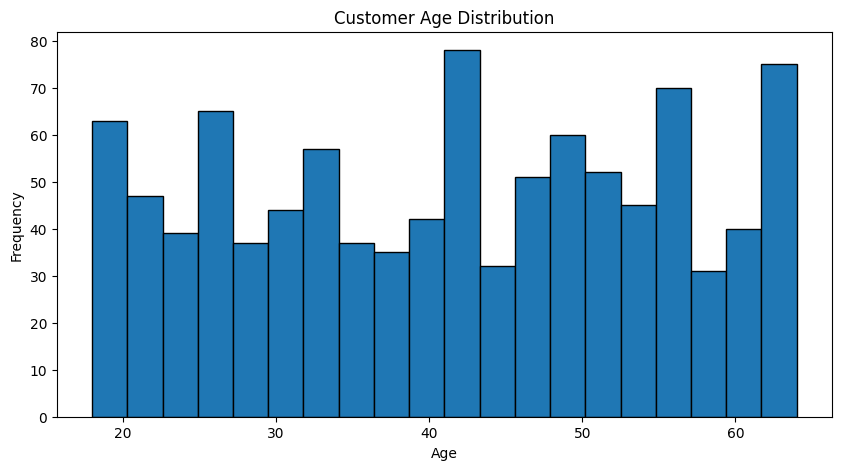

In [ ]:
# Visualization of customer age distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* For Product Analysis

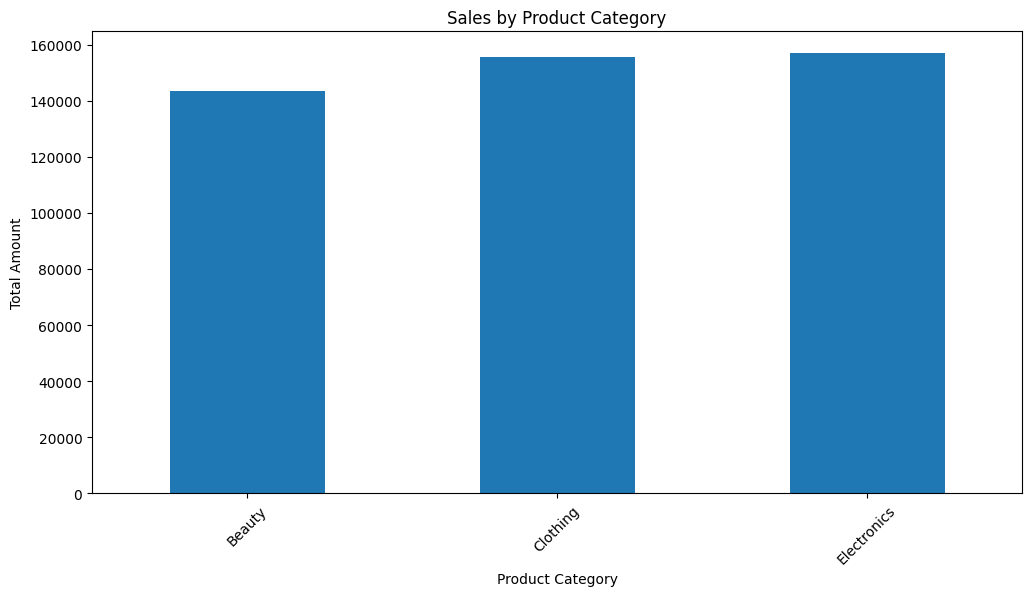

In [ ]:
# Visualization of product category sales
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

---
# 5. Visualization
* Bar Chart of Total Amount per day

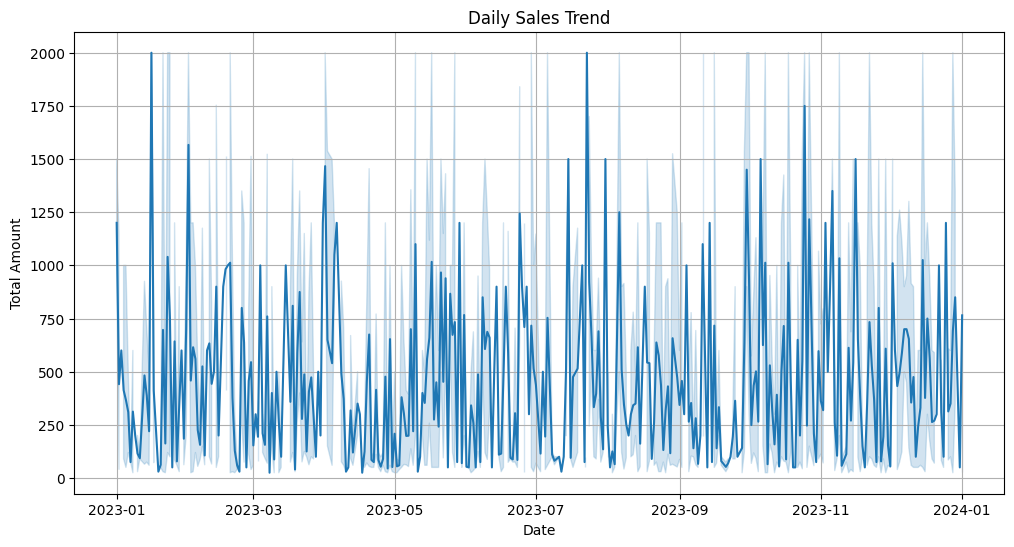

In [ ]:
# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Amount', data=df, markers=True)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


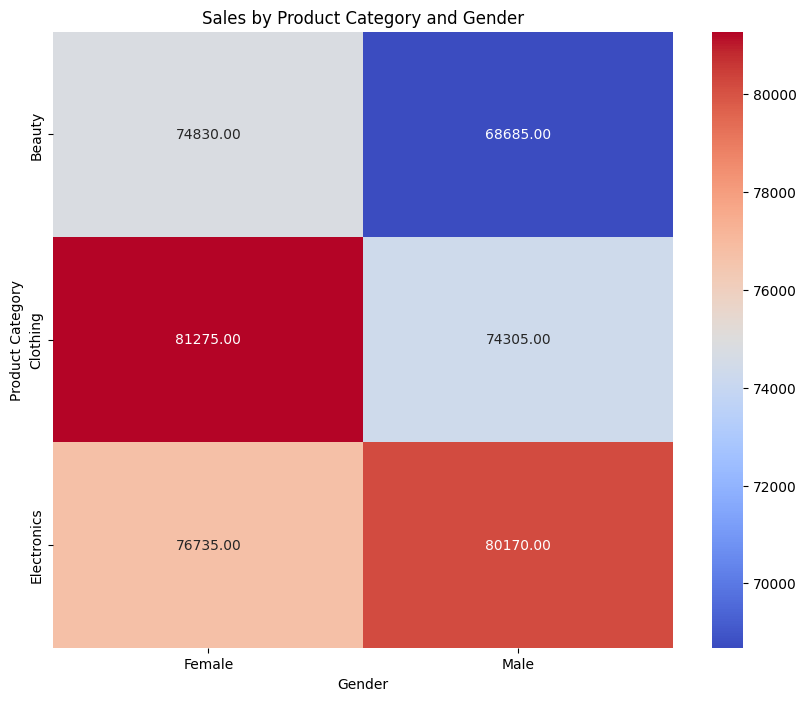

In [ ]:
# Pivot table for heatmap
pivot_table = df.pivot_table(index='Product Category', columns='Gender', values='Total Amount', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sales by Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Product Category')
plt.show()


---
# 6. Recommendations
* Focus on High-Selling Categories.
* Categories with higher total sales should be prioritized in marketing strategies.
* Tailor product offerings and promotions based on the age distribution and gender of your customers.
* Analyze the relationship between quantity sold and price per unit to adjust pricing strategies.
* Use time series analysis to forecast future sales and adjust inventory and marketing plans accordingly.